In [2]:
from sklearn import datasets, svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Em sala, vimos apenas como criar um modelo para duas classes (-1 ou 1). É possível extender as metodologias de treinamento para um número maior que dois (Isso será a lista de exercícios 4 - extra).

Consider o conjunto de dados `digits`

In [21]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

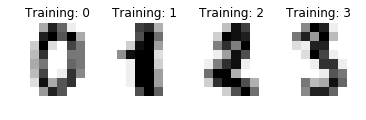

In [24]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [4]:
# reading data as matrices
X, y = datasets.load_digits(return_X_y = True)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [33]:
clf = RandomForestClassifier(n_estimators=10000, n_jobs = -1)
clf.fit(X_train, y_train)
print('Training done!')

Training done!


In [34]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)

0.9663299663299664


In [146]:
cnf_matrix

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 72,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 49,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 65]])

Confusion matrix, without normalization
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  1  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0 72  0  1  0  0]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  2  0  0  0  1  0  0 49  0]
 [ 0  0  0  1  0  0  0  1  1 65]]


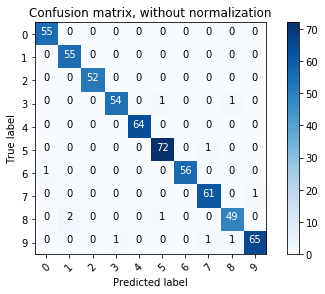

In [149]:
class_names = digits.target_names
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.96428571 0.         0.01785714
  0.         0.         0.01785714 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.98630137
  0.         0.01369863 0.         0.        ]
 [0.01754386 0.         0.         0.         0.         0.
  0.98245614 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.98387097 0.         0.01612903]
 [0.         0.03846154 0.         0.         0.         0.01923077
  0.         0.         0.942307

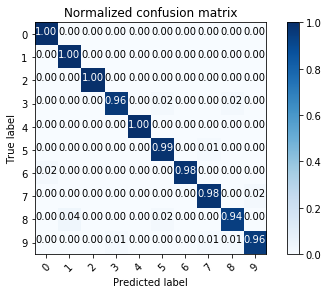

In [150]:
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [155]:
cValues = np.logspace(-10, 10, 20)
gammaValues = np.logspace(-10, 10, 20)
clf = GridSearchCV(svm.SVC(kernel = 'rbf'), param_grid = {'C': cValues, 'gamma': gammaValues}, n_jobs = -1, verbose = 10)
clf.fit(X_train, y_train)
print('Training done!')

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] C=1e-10, gamma=1e-10 ............................................
[CV] C=1e-10, gamma=1e-10 ............................................
[CV] C=1e-10, gamma=1e-10 ............................................
[CV] C=1e-10, gamma=1.1288378916846883e-09 ...........................
[CV] ... C=1e-10, gamma=1e-10, score=0.2074074074074074, total=   0.2s
[CV] C=1e-10, gamma=1.1288378916846883e-09 ...........................
[CV]  C=1e-10, gamma=1.1288378916846883e-09, score=0.19753086419753085, total=   0.2s
[CV] C=1e-10, gamma=1.1288378916846883e-09 ...........................
[CV] ............... C=1e-10, gamma=1e-10, score=0.2075, total=   0.2s
[CV] ... C=1e-10, gamma=1e-10, score=0.1884422110552764, total=   0.2s
[CV] C=1e-10, gamma=1.274274985703132e-08 ............................
[CV] C=1e-10, gamma=1.274274985703132e-08 ............................
[CV]  C=1e-10, gamma=1.1288378916846883e-09, score=0.2075, total=   0

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s


[CV]  C=1e-10, gamma=1.274274985703132e-08, score=0.1884422110552764, total=   0.4s
[CV] C=1e-10, gamma=1.6237767391887209e-06 ...........................
[CV]  C=1e-10, gamma=1.438449888287663e-07, score=0.19506172839506172, total=   0.4s
[CV] C=1e-10, gamma=1.6237767391887209e-06 ...........................
[CV]  C=1e-10, gamma=1.438449888287663e-07, score=0.2075, total=   0.4s
[CV] C=1e-10, gamma=1.6237767391887209e-06 ...........................
[CV]  C=1e-10, gamma=1.438449888287663e-07, score=0.1884422110552764, total=   0.4s
[CV] C=1e-10, gamma=1.8329807108324338e-05 ...........................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s


[CV]  C=1e-10, gamma=1.6237767391887209e-06, score=0.19506172839506172, total=   0.2s
[CV] C=1e-10, gamma=1.8329807108324338e-05 ...........................
[CV]  C=1e-10, gamma=1.6237767391887209e-06, score=0.2075, total=   0.2s
[CV] C=1e-10, gamma=1.8329807108324338e-05 ...........................
[CV]  C=1e-10, gamma=1.6237767391887209e-06, score=0.1884422110552764, total=   0.2s
[CV] C=1e-10, gamma=0.00020691380811147902 ...........................
[CV]  C=1e-10, gamma=1.8329807108324338e-05, score=0.19506172839506172, total=   0.2s
[CV] C=1e-10, gamma=0.00020691380811147902 ...........................
[CV]  C=1e-10, gamma=1.8329807108324338e-05, score=0.2075, total=   0.3s
[CV] C=1e-10, gamma=0.00020691380811147902 ...........................
[CV]  C=1e-10, gamma=1.8329807108324338e-05, score=0.19095477386934673, total=   0.3s
[CV] C=1e-10, gamma=0.002335721469090121 .............................
[CV]  C=1e-10, gamma=0.00020691380811147902, score=0.19753086419753085, total=   0.3s

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s


[CV]  C=1e-10, gamma=0.00020691380811147902, score=0.1934673366834171, total=   0.3s
[CV] C=1e-10, gamma=0.026366508987303555 .............................
[CV] ... C=1e-10, gamma=0.002335721469090121, score=0.2, total=   0.2s
[CV] C=1e-10, gamma=0.026366508987303555 .............................
[CV] .. C=1e-10, gamma=0.002335721469090121, score=0.21, total=   0.2s
[CV] C=1e-10, gamma=0.026366508987303555 .............................
[CV]  C=1e-10, gamma=0.002335721469090121, score=0.1884422110552764, total=   0.2s
[CV] C=1e-10, gamma=0.2976351441631313 ...............................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s


[CV]  C=1e-10, gamma=0.026366508987303555, score=0.10864197530864197, total=   0.3s
[CV] C=1e-10, gamma=0.2976351441631313 ...............................
[CV] . C=1e-10, gamma=0.026366508987303555, score=0.105, total=   0.3s
[CV] C=1e-10, gamma=0.2976351441631313 ...............................
[CV]  C=1e-10, gamma=0.026366508987303555, score=0.10552763819095477, total=   0.3s
[CV] C=1e-10, gamma=3.359818286283774 ................................
[CV]  C=1e-10, gamma=0.2976351441631313, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=3.359818286283774 ................................
[CV]  C=1e-10, gamma=3.359818286283774, score=0.14814814814814814, total=   0.2s
[CV] C=1e-10, gamma=3.359818286283774 ................................
[CV] ... C=1e-10, gamma=0.2976351441631313, score=0.105, total=   0.3s
[CV] C=1e-10, gamma=37.92690190732238 ................................
[CV] ... C=1e-10, gamma=3.359818286283774, score=0.1475, total=   0.2s
[CV] C=1e-10, gamma=37.9269019

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s


[CV]  C=1e-10, gamma=428.13323987193957, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=4832.930238571752 ................................
[CV] ... C=1e-10, gamma=428.13323987193957, score=0.105, total=   0.2s
[CV] C=1e-10, gamma=4832.930238571752 ................................
[CV]  C=1e-10, gamma=4832.930238571752, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=54555.947811685146 ...............................
[CV]  C=1e-10, gamma=428.13323987193957, score=0.10552763819095477, total=   0.2s
[CV] C=1e-10, gamma=54555.947811685146 ...............................
[CV] .... C=1e-10, gamma=4832.930238571752, score=0.105, total=   0.3s
[CV] C=1e-10, gamma=54555.947811685146 ...............................
[CV]  C=1e-10, gamma=4832.930238571752, score=0.10552763819095477, total=   0.3s
[CV] C=1e-10, gamma=615848.2110660254 ................................
[CV] ... C=1e-10, gamma=54555.947811685146, score=0.105, total=   0.3s
[CV]  C=1e-10, gamma=54555.94781168

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s


[CV]  C=1e-10, gamma=54555.947811685146, score=0.10552763819095477, total=   0.2s
[CV] C=1e-10, gamma=6951927.961775591 ................................
[CV]  C=1e-10, gamma=615848.2110660254, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=6951927.961775591 ................................
[CV] .... C=1e-10, gamma=615848.2110660254, score=0.105, total=   0.2s
[CV]  C=1e-10, gamma=615848.2110660254, score=0.10552763819095477, total=   0.2s
[CV] C=1e-10, gamma=6951927.961775591 ................................
[CV] C=1e-10, gamma=78475997.03514622 ................................
[CV]  C=1e-10, gamma=6951927.961775591, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=78475997.03514622 ................................
[CV] .... C=1e-10, gamma=6951927.961775591, score=0.105, total=   0.2s
[CV] C=1e-10, gamma=78475997.03514622 ................................
[CV]  C=1e-10, gamma=78475997.03514622, score=0.10617283950617284, total=   0.2s
[CV] C=1e-10, gamma=885866

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.5s


[CV]  C=1e-10, gamma=885866790.4100796, score=0.10552763819095477, total=   0.2s
[CV] C=1.1288378916846883e-09, gamma=1e-10 ...........................
[CV]  C=1e-10, gamma=10000000000.0, score=0.10617283950617284, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1e-10 ...........................
[CV] ........ C=1e-10, gamma=10000000000.0, score=0.105, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1e-10 ...........................
[CV]  C=1e-10, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.1288378916846883e-09 ..........
[CV]  C=1.1288378916846883e-09, gamma=1e-10, score=0.19753086419753085, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.1288378916846883e-09 ..........
[CV]  C=1.1288378916846883e-09, gamma=1e-10, score=0.2075, total=   0.4s
[CV] C=1.1288378916846883e-09, gamma=1.1288378916846883e-09 ..........
[CV]  C=1.1288378916846883e-09, gamma=1e-10, score=0.1884422110552764, total=   0.4s
[CV] C=1.128837891684688

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.6s


[CV]  C=1.1288378916846883e-09, gamma=1.1288378916846883e-09, score=0.2075, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.274274985703132e-08 ...........
[CV]  C=1.1288378916846883e-09, gamma=1.1288378916846883e-09, score=0.1884422110552764, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.438449888287663e-07 ...........
[CV]  C=1.1288378916846883e-09, gamma=1.274274985703132e-08, score=0.19506172839506172, total=   0.2s
[CV] C=1.1288378916846883e-09, gamma=1.438449888287663e-07 ...........
[CV]  C=1.1288378916846883e-09, gamma=1.274274985703132e-08, score=0.2075, total=   0.2s
[CV] C=1.1288378916846883e-09, gamma=1.438449888287663e-07 ...........
[CV]  C=1.1288378916846883e-09, gamma=1.274274985703132e-08, score=0.1884422110552764, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.6237767391887209e-06 ..........
[CV]  C=1.1288378916846883e-09, gamma=1.438449888287663e-07, score=0.19506172839506172, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=1.6237767391887209e-06

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.1s


[CV]  C=1.1288378916846883e-09, gamma=0.00020691380811147902, score=0.1934673366834171, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=0.026366508987303555 ............
[CV]  C=1.1288378916846883e-09, gamma=0.002335721469090121, score=0.2, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=0.026366508987303555 ............
[CV]  C=1.1288378916846883e-09, gamma=0.002335721469090121, score=0.21, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=0.026366508987303555 ............
[CV]  C=1.1288378916846883e-09, gamma=0.002335721469090121, score=0.1884422110552764, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=0.2976351441631313 ..............
[CV]  C=1.1288378916846883e-09, gamma=0.026366508987303555, score=0.10864197530864197, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=0.2976351441631313 ..............
[CV]  C=1.1288378916846883e-09, gamma=0.026366508987303555, score=0.105, total=   0.4s
[CV] C=1.1288378916846883e-09, gamma=0.2976351441631313 ..............
[CV]  C=1.128

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.9s


[CV]  C=1.1288378916846883e-09, gamma=3.359818286283774, score=0.135678391959799, total=   0.3s
[CV]  C=1.1288378916846883e-09, gamma=37.92690190732238, score=0.10617283950617284, total=   0.3s
[CV] C=1.1288378916846883e-09, gamma=428.13323987193957 ..............
[CV] C=1.1288378916846883e-09, gamma=428.13323987193957 ..............
[CV]  C=1.1288378916846883e-09, gamma=37.92690190732238, score=0.105, total=   0.4s
[CV] C=1.1288378916846883e-09, gamma=428.13323987193957 ..............
[CV]  C=1.1288378916846883e-09, gamma=37.92690190732238, score=0.10552763819095477, total=   0.4s
[CV] C=1.1288378916846883e-09, gamma=4832.930238571752 ...............
[CV]  C=1.1288378916846883e-09, gamma=428.13323987193957, score=0.10617283950617284, total=   0.5s
[CV] C=1.1288378916846883e-09, gamma=4832.930238571752 ...............
[CV]  C=1.1288378916846883e-09, gamma=428.13323987193957, score=0.105, total=   0.5s
[CV] C=1.1288378916846883e-09, gamma=4832.930238571752 ...............
[CV]  C=1.1288

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.7s


[CV]  C=1.1288378916846883e-09, gamma=615848.2110660254, score=0.105, total=   0.5s
[CV] C=1.1288378916846883e-09, gamma=6951927.961775591 ...............
[CV]  C=1.1288378916846883e-09, gamma=615848.2110660254, score=0.10552763819095477, total=   0.6s
[CV] C=1.1288378916846883e-09, gamma=78475997.03514622 ...............
[CV]  C=1.1288378916846883e-09, gamma=6951927.961775591, score=0.105, total=   0.7s
[CV]  C=1.1288378916846883e-09, gamma=6951927.961775591, score=0.10617283950617284, total=   0.7s
[CV] C=1.1288378916846883e-09, gamma=78475997.03514622 ...............
[CV] C=1.1288378916846883e-09, gamma=78475997.03514622 ...............
[CV]  C=1.1288378916846883e-09, gamma=6951927.961775591, score=0.10552763819095477, total=   0.7s
[CV] C=1.1288378916846883e-09, gamma=885866790.4100796 ...............
[CV]  C=1.1288378916846883e-09, gamma=78475997.03514622, score=0.10617283950617284, total=   0.6s
[CV] C=1.1288378916846883e-09, gamma=885866790.4100796 ...............
[CV]  C=1.1288

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.0s


[CV]  C=1.274274985703132e-08, gamma=1e-10, score=0.19506172839506172, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.1288378916846883e-09 ...........
[CV]  C=1.274274985703132e-08, gamma=1e-10, score=0.2075, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.1288378916846883e-09 ...........
[CV]  C=1.274274985703132e-08, gamma=1e-10, score=0.19095477386934673, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.274274985703132e-08 ............
[CV]  C=1.274274985703132e-08, gamma=1.1288378916846883e-09, score=0.19506172839506172, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.274274985703132e-08 ............
[CV]  C=1.274274985703132e-08, gamma=1.1288378916846883e-09, score=0.2075, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.274274985703132e-08 ............
[CV]  C=1.274274985703132e-08, gamma=1.1288378916846883e-09, score=0.1884422110552764, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=1.438449888287663e-07 ............
[CV]  C=1.274274985703132e-08, gamma=1.2

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.3s


[CV]  C=1.274274985703132e-08, gamma=0.00020691380811147902, score=0.1934673366834171, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=0.026366508987303555 .............
[CV]  C=1.274274985703132e-08, gamma=0.002335721469090121, score=0.2, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=0.026366508987303555 .............
[CV]  C=1.274274985703132e-08, gamma=0.002335721469090121, score=0.21, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=0.026366508987303555 .............
[CV]  C=1.274274985703132e-08, gamma=0.002335721469090121, score=0.1884422110552764, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=0.2976351441631313 ...............
[CV]  C=1.274274985703132e-08, gamma=0.026366508987303555, score=0.10864197530864197, total=   0.5s
[CV] C=1.274274985703132e-08, gamma=0.2976351441631313 ...............
[CV]  C=1.274274985703132e-08, gamma=0.026366508987303555, score=0.105, total=   0.6s
[CV] C=1.274274985703132e-08, gamma=0.2976351441631313 ...............
[CV]  C=1.274274985

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.8s


[CV]  C=1.274274985703132e-08, gamma=428.13323987193957, score=0.10617283950617284, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=4832.930238571752 ................
[CV]  C=1.274274985703132e-08, gamma=428.13323987193957, score=0.105, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=4832.930238571752 ................
[CV]  C=1.274274985703132e-08, gamma=428.13323987193957, score=0.10552763819095477, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=54555.947811685146 ...............
[CV]  C=1.274274985703132e-08, gamma=4832.930238571752, score=0.10617283950617284, total=   0.3s
[CV] C=1.274274985703132e-08, gamma=54555.947811685146 ...............
[CV]  C=1.274274985703132e-08, gamma=4832.930238571752, score=0.105, total=   0.4s
[CV] C=1.274274985703132e-08, gamma=54555.947811685146 ...............
[CV]  C=1.274274985703132e-08, gamma=4832.930238571752, score=0.10552763819095477, total=   0.4s
[CV] C=1.274274985703132e-08, gamma=615848.2110660254 ................
[CV]  C=1.2742749

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.9s


[CV]  C=1.274274985703132e-08, gamma=885866790.4100796, score=0.105, total=   0.6s
[CV] C=1.274274985703132e-08, gamma=10000000000.0 ....................
[CV]  C=1.274274985703132e-08, gamma=885866790.4100796, score=0.10552763819095477, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=1e-10 ............................
[CV]  C=1.274274985703132e-08, gamma=10000000000.0, score=0.10617283950617284, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=1e-10 ............................
[CV]  C=1.274274985703132e-08, gamma=10000000000.0, score=0.105, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=1e-10 ............................
[CV]  C=1.274274985703132e-08, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=1.438449888287663e-07, gamma=1.1288378916846883e-09 ...........
[CV]  C=1.438449888287663e-07, gamma=1e-10, score=0.19506172839506172, total=   0.6s
[CV] C=1.438449888287663e-07, gamma=1.1288378916846883e-09 ...........
[CV]  C=1.438449888287663e-07, gamma=1e-10, 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.8s


[CV]  C=1.438449888287663e-07, gamma=1.6237767391887209e-06, score=0.19506172839506172, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=1.8329807108324338e-05 ...........
[CV]  C=1.438449888287663e-07, gamma=1.6237767391887209e-06, score=0.2075, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=1.8329807108324338e-05 ...........
[CV]  C=1.438449888287663e-07, gamma=1.6237767391887209e-06, score=0.1884422110552764, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=0.00020691380811147902 ...........
[CV]  C=1.438449888287663e-07, gamma=1.8329807108324338e-05, score=0.19506172839506172, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=0.00020691380811147902 ...........
[CV]  C=1.438449888287663e-07, gamma=1.8329807108324338e-05, score=0.2075, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=0.00020691380811147902 ...........
[CV]  C=1.438449888287663e-07, gamma=1.8329807108324338e-05, score=0.19095477386934673, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=0.002335721469090121 ...

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   29.3s


[CV]  C=1.438449888287663e-07, gamma=37.92690190732238, score=0.105, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=428.13323987193957 ...............
[CV]  C=1.438449888287663e-07, gamma=37.92690190732238, score=0.10552763819095477, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=4832.930238571752 ................
[CV]  C=1.438449888287663e-07, gamma=428.13323987193957, score=0.10617283950617284, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=4832.930238571752 ................
[CV]  C=1.438449888287663e-07, gamma=428.13323987193957, score=0.105, total=   0.4s
[CV] C=1.438449888287663e-07, gamma=4832.930238571752 ................
[CV]  C=1.438449888287663e-07, gamma=428.13323987193957, score=0.10552763819095477, total=   0.3s
[CV]  C=1.438449888287663e-07, gamma=4832.930238571752, score=0.10617283950617284, total=   0.3s
[CV] C=1.438449888287663e-07, gamma=54555.947811685146 ...............
[CV] C=1.438449888287663e-07, gamma=54555.947811685146 ...............
[CV]  C=1.4384498

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   32.5s


[CV]  C=1.438449888287663e-07, gamma=885866790.4100796, score=0.10552763819095477, total=   0.4s
[CV] C=1.6237767391887209e-06, gamma=1e-10 ...........................
[CV]  C=1.438449888287663e-07, gamma=10000000000.0, score=0.10617283950617284, total=   0.4s
[CV] C=1.6237767391887209e-06, gamma=1e-10 ...........................
[CV]  C=1.438449888287663e-07, gamma=10000000000.0, score=0.105, total=   0.3s
[CV]  C=1.438449888287663e-07, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=1.1288378916846883e-09 ..........
[CV] C=1.6237767391887209e-06, gamma=1e-10 ...........................
[CV]  C=1.6237767391887209e-06, gamma=1e-10, score=0.19506172839506172, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=1.1288378916846883e-09 ..........
[CV]  C=1.6237767391887209e-06, gamma=1e-10, score=0.2075, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=1.1288378916846883e-09 ..........
[CV]  C=1.6237767391887209e-06, gamma=1e-10, score=0.

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   36.1s


[CV]  C=1.6237767391887209e-06, gamma=0.00020691380811147902, score=0.19753086419753085, total=   0.5s
[CV] C=1.6237767391887209e-06, gamma=0.002335721469090121 ............
[CV]  C=1.6237767391887209e-06, gamma=0.00020691380811147902, score=0.21, total=   0.5s
[CV] C=1.6237767391887209e-06, gamma=0.002335721469090121 ............
[CV]  C=1.6237767391887209e-06, gamma=0.00020691380811147902, score=0.1934673366834171, total=   0.6s
[CV] C=1.6237767391887209e-06, gamma=0.026366508987303555 ............
[CV]  C=1.6237767391887209e-06, gamma=0.002335721469090121, score=0.2, total=   0.5s
[CV] C=1.6237767391887209e-06, gamma=0.026366508987303555 ............
[CV]  C=1.6237767391887209e-06, gamma=0.002335721469090121, score=0.21, total=   0.5s
[CV] C=1.6237767391887209e-06, gamma=0.026366508987303555 ............
[CV]  C=1.6237767391887209e-06, gamma=0.002335721469090121, score=0.1884422110552764, total=   0.5s
[CV] C=1.6237767391887209e-06, gamma=0.2976351441631313 ..............
[CV]  C=1.

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   39.5s


[CV]  C=1.6237767391887209e-06, gamma=4832.930238571752, score=0.10552763819095477, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=54555.947811685146 ..............
[CV]  C=1.6237767391887209e-06, gamma=4832.930238571752, score=0.105, total=   0.4s
[CV] C=1.6237767391887209e-06, gamma=615848.2110660254 ...............
[CV]  C=1.6237767391887209e-06, gamma=54555.947811685146, score=0.10617283950617284, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=615848.2110660254 ...............
[CV]  C=1.6237767391887209e-06, gamma=54555.947811685146, score=0.105, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=615848.2110660254 ...............
[CV]  C=1.6237767391887209e-06, gamma=54555.947811685146, score=0.10552763819095477, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=6951927.961775591 ...............
[CV]  C=1.6237767391887209e-06, gamma=615848.2110660254, score=0.10617283950617284, total=   0.3s
[CV] C=1.6237767391887209e-06, gamma=6951927.961775591 ...............
[CV]  C=1.6

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   43.0s


[CV]  C=1.8329807108324338e-05, gamma=1.274274985703132e-08, score=0.1884422110552764, total=   0.4s
[CV] C=1.8329807108324338e-05, gamma=1.6237767391887209e-06 ..........
[CV]  C=1.8329807108324338e-05, gamma=1.438449888287663e-07, score=0.19506172839506172, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=1.6237767391887209e-06 ..........
[CV]  C=1.8329807108324338e-05, gamma=1.438449888287663e-07, score=0.2075, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=1.6237767391887209e-06 ..........
[CV]  C=1.8329807108324338e-05, gamma=1.438449888287663e-07, score=0.1884422110552764, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=1.8329807108324338e-05 ..........
[CV]  C=1.8329807108324338e-05, gamma=1.6237767391887209e-06, score=0.19506172839506172, total=   0.4s
[CV] C=1.8329807108324338e-05, gamma=1.8329807108324338e-05 ..........
[CV]  C=1.8329807108324338e-05, gamma=1.6237767391887209e-06, score=0.1884422110552764, total=   0.3s
[CV]  C=1.8329807108324338e-05, gamma=1.6237767

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   46.6s


[CV]  C=1.8329807108324338e-05, gamma=3.359818286283774, score=0.13819095477386933, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=428.13323987193957 ..............
[CV]  C=1.8329807108324338e-05, gamma=37.92690190732238, score=0.10617283950617284, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=428.13323987193957 ..............
[CV]  C=1.8329807108324338e-05, gamma=37.92690190732238, score=0.105, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=428.13323987193957 ..............
[CV]  C=1.8329807108324338e-05, gamma=37.92690190732238, score=0.10552763819095477, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=4832.930238571752 ...............
[CV]  C=1.8329807108324338e-05, gamma=428.13323987193957, score=0.10617283950617284, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=4832.930238571752 ...............
[CV]  C=1.8329807108324338e-05, gamma=428.13323987193957, score=0.105, total=   0.3s
[CV] C=1.8329807108324338e-05, gamma=4832.930238571752 ...............
[CV]  C=1.83

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.8s


[CV] C=0.00020691380811147902, gamma=1e-10 ...........................
[CV]  C=1.8329807108324338e-05, gamma=10000000000.0, score=0.105, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1e-10 ...........................
[CV]  C=1.8329807108324338e-05, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1.1288378916846883e-09 ..........
[CV]  C=0.00020691380811147902, gamma=1e-10, score=0.19506172839506172, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1.1288378916846883e-09 ..........
[CV]  C=0.00020691380811147902, gamma=1e-10, score=0.2075, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1.1288378916846883e-09 ..........
[CV]  C=0.00020691380811147902, gamma=1e-10, score=0.19095477386934673, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1.274274985703132e-08 ...........
[CV]  C=0.00020691380811147902, gamma=1.1288378916846883e-09, score=0.19506172839506172, total=   0.3s
[CV] C=0.00020691380811147902, gamma=1.2742749857031

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   52.9s


[CV]  C=0.00020691380811147902, gamma=0.026366508987303555, score=0.105, total=   0.3s
[CV] C=0.00020691380811147902, gamma=0.2976351441631313 ..............
[CV]  C=0.00020691380811147902, gamma=0.026366508987303555, score=0.10552763819095477, total=   0.3s
[CV] C=0.00020691380811147902, gamma=3.359818286283774 ...............
[CV]  C=0.00020691380811147902, gamma=0.2976351441631313, score=0.10617283950617284, total=   0.3s
[CV] C=0.00020691380811147902, gamma=3.359818286283774 ...............
[CV]  C=0.00020691380811147902, gamma=0.2976351441631313, score=0.105, total=   0.3s
[CV] C=0.00020691380811147902, gamma=3.359818286283774 ...............
[CV]  C=0.00020691380811147902, gamma=3.359818286283774, score=0.1506172839506173, total=   0.2s
[CV] C=0.00020691380811147902, gamma=37.92690190732238 ...............
[CV]  C=0.00020691380811147902, gamma=0.2976351441631313, score=0.10552763819095477, total=   0.3s
[CV]  C=0.00020691380811147902, gamma=3.359818286283774, score=0.1525, total=

[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   55.9s


[CV]  C=0.00020691380811147902, gamma=885866790.4100796, score=0.105, total=   0.3s
[CV] C=0.00020691380811147902, gamma=10000000000.0 ...................
[CV]  C=0.00020691380811147902, gamma=885866790.4100796, score=0.10552763819095477, total=   0.3s
[CV] C=0.002335721469090121, gamma=1e-10 .............................
[CV]  C=0.00020691380811147902, gamma=10000000000.0, score=0.10617283950617284, total=   0.3s
[CV] C=0.002335721469090121, gamma=1e-10 .............................
[CV]  C=0.00020691380811147902, gamma=10000000000.0, score=0.105, total=   0.3s
[CV] C=0.002335721469090121, gamma=1e-10 .............................
[CV]  C=0.00020691380811147902, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=0.002335721469090121, gamma=1.1288378916846883e-09 ............
[CV]  C=0.002335721469090121, gamma=1e-10, score=0.2075, total=   0.4s
[CV]  C=0.002335721469090121, gamma=1e-10, score=0.19506172839506172, total=   0.4s
[CV] C=0.002335721469090121, gamma=1.128

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   59.9s


[CV] C=0.002335721469090121, gamma=0.2976351441631313 ................
[CV]  C=0.002335721469090121, gamma=0.026366508987303555, score=0.10864197530864197, total=   0.4s
[CV]  C=0.002335721469090121, gamma=0.026366508987303555, score=0.105, total=   0.4s
[CV] C=0.002335721469090121, gamma=0.2976351441631313 ................
[CV] C=0.002335721469090121, gamma=0.2976351441631313 ................
[CV]  C=0.002335721469090121, gamma=0.026366508987303555, score=0.10552763819095477, total=   0.3s
[CV] C=0.002335721469090121, gamma=3.359818286283774 .................
[CV]  C=0.002335721469090121, gamma=0.2976351441631313, score=0.10617283950617284, total=   0.3s
[CV] C=0.002335721469090121, gamma=3.359818286283774 .................
[CV]  C=0.002335721469090121, gamma=0.2976351441631313, score=0.10552763819095477, total=   0.3s
[CV]  C=0.002335721469090121, gamma=0.2976351441631313, score=0.105, total=   0.4s
[CV] C=0.002335721469090121, gamma=3.359818286283774 .................
[CV]  C=0.0023

[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  1.1min


[CV]  C=0.002335721469090121, gamma=885866790.4100796, score=0.10552763819095477, total=   0.3s
[CV] C=0.026366508987303555, gamma=1e-10 .............................
[CV]  C=0.002335721469090121, gamma=10000000000.0, score=0.105, total=   0.2s
[CV] C=0.026366508987303555, gamma=1e-10 .............................
[CV]  C=0.002335721469090121, gamma=10000000000.0, score=0.10617283950617284, total=   0.3s
[CV] C=0.026366508987303555, gamma=1e-10 .............................
[CV]  C=0.002335721469090121, gamma=10000000000.0, score=0.10552763819095477, total=   0.2s
[CV] C=0.026366508987303555, gamma=1.1288378916846883e-09 ............
[CV]  C=0.026366508987303555, gamma=1e-10, score=0.19506172839506172, total=   0.3s
[CV] C=0.026366508987303555, gamma=1.1288378916846883e-09 ............
[CV]  C=0.026366508987303555, gamma=1e-10, score=0.19095477386934673, total=   0.3s
[CV]  C=0.026366508987303555, gamma=1e-10, score=0.2075, total=   0.3s
[CV] C=0.026366508987303555, gamma=1.12883789168

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min


[CV]  C=0.026366508987303555, gamma=0.026366508987303555, score=0.10864197530864197, total=   0.3s
[CV] C=0.026366508987303555, gamma=0.2976351441631313 ................
[CV]  C=0.026366508987303555, gamma=0.026366508987303555, score=0.105, total=   0.3s
[CV] C=0.026366508987303555, gamma=0.2976351441631313 ................
[CV]  C=0.026366508987303555, gamma=0.026366508987303555, score=0.10552763819095477, total=   0.3s
[CV] C=0.026366508987303555, gamma=3.359818286283774 .................
[CV]  C=0.026366508987303555, gamma=0.2976351441631313, score=0.10617283950617284, total=   0.3s
[CV] C=0.026366508987303555, gamma=3.359818286283774 .................
[CV]  C=0.026366508987303555, gamma=3.359818286283774, score=0.15308641975308643, total=   0.3s
[CV] C=0.026366508987303555, gamma=3.359818286283774 .................
[CV]  C=0.026366508987303555, gamma=0.2976351441631313, score=0.105, total=   0.3s
[CV]  C=0.026366508987303555, gamma=3.359818286283774, score=0.1525, total=   0.2s
[CV

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.2min


[CV] C=0.2976351441631313, gamma=1.1288378916846883e-09 ..............
[CV]  C=0.2976351441631313, gamma=1e-10, score=0.19506172839506172, total=   0.3s
[CV] C=0.2976351441631313, gamma=1.1288378916846883e-09 ..............
[CV] .. C=0.2976351441631313, gamma=1e-10, score=0.2075, total=   0.3s
[CV] C=0.2976351441631313, gamma=1.1288378916846883e-09 ..............
[CV]  C=0.2976351441631313, gamma=1e-10, score=0.19095477386934673, total=   0.3s
[CV] C=0.2976351441631313, gamma=1.274274985703132e-08 ...............
[CV]  C=0.2976351441631313, gamma=1.1288378916846883e-09, score=0.19506172839506172, total=   0.4s
[CV] C=0.2976351441631313, gamma=1.274274985703132e-08 ...............
[CV]  C=0.2976351441631313, gamma=1.1288378916846883e-09, score=0.2075, total=   0.4s
[CV] C=0.2976351441631313, gamma=1.274274985703132e-08 ...............
[CV]  C=0.2976351441631313, gamma=1.274274985703132e-08, score=0.19506172839506172, total=   0.3s
[CV]  C=0.2976351441631313, gamma=1.1288378916846883e-09

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  1.3min


[CV]  C=0.2976351441631313, gamma=3.359818286283774, score=0.13819095477386933, total=   0.4s
[CV] C=0.2976351441631313, gamma=428.13323987193957 ..................
[CV]  C=0.2976351441631313, gamma=37.92690190732238, score=0.10617283950617284, total=   0.4s
[CV] C=0.2976351441631313, gamma=428.13323987193957 ..................
[CV]  C=0.2976351441631313, gamma=37.92690190732238, score=0.105, total=   0.4s
[CV] C=0.2976351441631313, gamma=428.13323987193957 ..................
[CV]  C=0.2976351441631313, gamma=37.92690190732238, score=0.10552763819095477, total=   0.3s
[CV] C=0.2976351441631313, gamma=4832.930238571752 ...................
[CV]  C=0.2976351441631313, gamma=428.13323987193957, score=0.10617283950617284, total=   0.4s
[CV] C=0.2976351441631313, gamma=4832.930238571752 ...................
[CV]  C=0.2976351441631313, gamma=428.13323987193957, score=0.105, total=   0.4s
[CV] C=0.2976351441631313, gamma=4832.930238571752 ...................
[CV]  C=0.2976351441631313, gamma=42

[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  1.4min


[CV]  C=3.359818286283774, gamma=1.274274985703132e-08, score=0.19506172839506172, total=   0.4s
[CV] C=3.359818286283774, gamma=1.438449888287663e-07 ................
[CV]  C=3.359818286283774, gamma=1.274274985703132e-08, score=0.2075, total=   0.4s
[CV] C=3.359818286283774, gamma=1.438449888287663e-07 ................
[CV]  C=3.359818286283774, gamma=1.274274985703132e-08, score=0.1884422110552764, total=   0.5s
[CV] C=3.359818286283774, gamma=1.6237767391887209e-06 ...............
[CV]  C=3.359818286283774, gamma=1.438449888287663e-07, score=0.19506172839506172, total=   0.5s
[CV] C=3.359818286283774, gamma=1.6237767391887209e-06 ...............
[CV]  C=3.359818286283774, gamma=1.438449888287663e-07, score=0.2075, total=   0.3s
[CV] C=3.359818286283774, gamma=1.6237767391887209e-06 ...............
[CV]  C=3.359818286283774, gamma=1.438449888287663e-07, score=0.1884422110552764, total=   0.3s
[CV] C=3.359818286283774, gamma=1.8329807108324338e-05 ...............
[CV]  C=3.3598182862

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min


[CV]  C=3.359818286283774, gamma=4832.930238571752, score=0.105, total=   0.3s
[CV] C=3.359818286283774, gamma=54555.947811685146 ...................
[CV]  C=3.359818286283774, gamma=4832.930238571752, score=0.10552763819095477, total=   0.3s
[CV] C=3.359818286283774, gamma=615848.2110660254 ....................
[CV]  C=3.359818286283774, gamma=54555.947811685146, score=0.10617283950617284, total=   0.3s
[CV] C=3.359818286283774, gamma=615848.2110660254 ....................
[CV]  C=3.359818286283774, gamma=54555.947811685146, score=0.105, total=   0.3s
[CV] C=3.359818286283774, gamma=615848.2110660254 ....................
[CV]  C=3.359818286283774, gamma=54555.947811685146, score=0.10552763819095477, total=   0.3s
[CV] C=3.359818286283774, gamma=6951927.961775591 ....................
[CV]  C=3.359818286283774, gamma=615848.2110660254, score=0.10617283950617284, total=   0.4s
[CV] C=3.359818286283774, gamma=6951927.961775591 ....................
[CV]  C=3.359818286283774, gamma=615848.2

[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  1.5min


[CV]  C=37.92690190732238, gamma=0.00020691380811147902, score=0.985, total=   0.1s
[CV] C=37.92690190732238, gamma=0.002335721469090121 .................
[CV]  C=37.92690190732238, gamma=0.00020691380811147902, score=0.9773869346733668, total=   0.2s
[CV] C=37.92690190732238, gamma=0.026366508987303555 .................
[CV]  C=37.92690190732238, gamma=0.002335721469090121, score=0.9777777777777777, total=   0.5s
[CV] C=37.92690190732238, gamma=0.026366508987303555 .................
[CV]  C=37.92690190732238, gamma=0.002335721469090121, score=0.9925, total=   0.5s
[CV] C=37.92690190732238, gamma=0.026366508987303555 .................
[CV]  C=37.92690190732238, gamma=0.002335721469090121, score=0.9748743718592965, total=   0.4s
[CV] C=37.92690190732238, gamma=0.2976351441631313 ...................
[CV]  C=37.92690190732238, gamma=0.026366508987303555, score=0.1728395061728395, total=   0.7s
[CV] C=37.92690190732238, gamma=0.2976351441631313 ...................
[CV]  C=37.92690190732238

[Parallel(n_jobs=-1)]: Done 714 tasks      | elapsed:  1.6min


[CV]  C=37.92690190732238, gamma=885866790.4100796, score=0.10617283950617284, total=   0.4s
[CV] C=37.92690190732238, gamma=10000000000.0 ........................
[CV]  C=37.92690190732238, gamma=885866790.4100796, score=0.105, total=   0.5s
[CV] C=37.92690190732238, gamma=10000000000.0 ........................
[CV]  C=37.92690190732238, gamma=885866790.4100796, score=0.10552763819095477, total=   0.5s
[CV] C=428.13323987193957, gamma=1e-10 ...............................
[CV]  C=37.92690190732238, gamma=10000000000.0, score=0.10617283950617284, total=   0.4s
[CV] C=428.13323987193957, gamma=1e-10 ...............................
[CV]  C=37.92690190732238, gamma=10000000000.0, score=0.105, total=   0.3s
[CV] C=428.13323987193957, gamma=1e-10 ...............................
[CV]  C=37.92690190732238, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=428.13323987193957, gamma=1.1288378916846883e-09 ..............
[CV]  C=428.13323987193957, gamma=1e-10, score=0.1950617

[Parallel(n_jobs=-1)]: Done 753 tasks      | elapsed:  1.7min


[CV]  C=428.13323987193957, gamma=37.92690190732238, score=0.10617283950617284, total=   0.5s
[CV] C=428.13323987193957, gamma=428.13323987193957 ..................
[CV]  C=428.13323987193957, gamma=37.92690190732238, score=0.105, total=   0.5s
[CV] C=428.13323987193957, gamma=428.13323987193957 ..................
[CV]  C=428.13323987193957, gamma=37.92690190732238, score=0.10552763819095477, total=   0.5s
[CV] C=428.13323987193957, gamma=4832.930238571752 ...................
[CV]  C=428.13323987193957, gamma=428.13323987193957, score=0.10617283950617284, total=   0.5s
[CV] C=428.13323987193957, gamma=4832.930238571752 ...................
[CV]  C=428.13323987193957, gamma=428.13323987193957, score=0.105, total=   0.5s
[CV] C=428.13323987193957, gamma=4832.930238571752 ...................
[CV]  C=428.13323987193957, gamma=428.13323987193957, score=0.10552763819095477, total=   0.5s
[CV] C=428.13323987193957, gamma=54555.947811685146 ..................
[CV]  C=428.13323987193957, gamma=4

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min


[CV]  C=4832.930238571752, gamma=1.8329807108324338e-05, score=0.9675, total=   0.1s
[CV] C=4832.930238571752, gamma=0.00020691380811147902 ...............
[CV] C=4832.930238571752, gamma=0.00020691380811147902 ...............
[CV]  C=4832.930238571752, gamma=1.8329807108324338e-05, score=0.9623115577889447, total=   0.1s
[CV] C=4832.930238571752, gamma=0.002335721469090121 .................
[CV]  C=4832.930238571752, gamma=0.00020691380811147902, score=0.9753086419753086, total=   0.1s
[CV] C=4832.930238571752, gamma=0.002335721469090121 .................
[CV]  C=4832.930238571752, gamma=0.00020691380811147902, score=0.985, total=   0.2s
[CV] C=4832.930238571752, gamma=0.002335721469090121 .................
[CV]  C=4832.930238571752, gamma=0.00020691380811147902, score=0.9773869346733668, total=   0.2s
[CV] C=4832.930238571752, gamma=0.026366508987303555 .................
[CV]  C=4832.930238571752, gamma=0.002335721469090121, score=0.9777777777777777, total=   0.4s
[CV] C=4832.9302385

[Parallel(n_jobs=-1)]: Done 833 tasks      | elapsed:  1.9min


[CV]  C=4832.930238571752, gamma=885866790.4100796, score=0.10617283950617284, total=   0.3s
[CV] C=4832.930238571752, gamma=10000000000.0 ........................
[CV]  C=4832.930238571752, gamma=885866790.4100796, score=0.105, total=   0.3s
[CV] C=4832.930238571752, gamma=10000000000.0 ........................
[CV]  C=4832.930238571752, gamma=885866790.4100796, score=0.10552763819095477, total=   0.3s
[CV] C=54555.947811685146, gamma=1e-10 ...............................
[CV]  C=4832.930238571752, gamma=10000000000.0, score=0.10617283950617284, total=   0.3s
[CV] C=54555.947811685146, gamma=1e-10 ...............................
[CV]  C=4832.930238571752, gamma=10000000000.0, score=0.105, total=   0.3s
[CV] C=54555.947811685146, gamma=1e-10 ...............................
[CV]  C=4832.930238571752, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s
[CV] C=54555.947811685146, gamma=1.1288378916846883e-09 ..............
[CV]  C=54555.947811685146, gamma=1e-10, score=0.4098765

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.0min


[CV]  C=54555.947811685146, gamma=428.13323987193957, score=0.10617283950617284, total=   0.5s
[CV] C=54555.947811685146, gamma=4832.930238571752 ...................
[CV]  C=54555.947811685146, gamma=428.13323987193957, score=0.105, total=   0.5s
[CV] C=54555.947811685146, gamma=4832.930238571752 ...................
[CV]  C=54555.947811685146, gamma=428.13323987193957, score=0.10552763819095477, total=   0.5s
[CV] C=54555.947811685146, gamma=54555.947811685146 ..................
[CV]  C=54555.947811685146, gamma=4832.930238571752, score=0.10617283950617284, total=   0.5s
[CV] C=54555.947811685146, gamma=54555.947811685146 ..................
[CV]  C=54555.947811685146, gamma=4832.930238571752, score=0.105, total=   0.5s
[CV] C=54555.947811685146, gamma=54555.947811685146 ..................
[CV]  C=54555.947811685146, gamma=4832.930238571752, score=0.10552763819095477, total=   0.4s
[CV] C=54555.947811685146, gamma=615848.2110660254 ...................
[CV]  C=54555.947811685146, gamma=5

[Parallel(n_jobs=-1)]: Done 917 tasks      | elapsed:  2.0min


[CV]  C=615848.2110660254, gamma=0.00020691380811147902, score=0.9753086419753086, total=   0.2s
[CV] C=615848.2110660254, gamma=0.002335721469090121 .................
[CV]  C=615848.2110660254, gamma=0.00020691380811147902, score=0.9773869346733668, total=   0.2s
[CV]  C=615848.2110660254, gamma=0.00020691380811147902, score=0.985, total=   0.2s
[CV] C=615848.2110660254, gamma=0.002335721469090121 .................
[CV] C=615848.2110660254, gamma=0.026366508987303555 .................
[CV]  C=615848.2110660254, gamma=0.002335721469090121, score=0.9925, total=   0.4s
[CV]  C=615848.2110660254, gamma=0.002335721469090121, score=0.9777777777777777, total=   0.4s
[CV] C=615848.2110660254, gamma=0.026366508987303555 .................
[CV] C=615848.2110660254, gamma=0.026366508987303555 .................
[CV]  C=615848.2110660254, gamma=0.002335721469090121, score=0.9748743718592965, total=   0.4s
[CV] C=615848.2110660254, gamma=0.2976351441631313 ...................
[CV]  C=615848.21106602

[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  2.1min


[CV]  C=6951927.961775591, gamma=1.1288378916846883e-09, score=0.9725, total=   0.2s
[CV]  C=6951927.961775591, gamma=1.1288378916846883e-09, score=0.9654320987654321, total=   0.2s
[CV] C=6951927.961775591, gamma=1.274274985703132e-08 ................
[CV] C=6951927.961775591, gamma=1.274274985703132e-08 ................
[CV]  C=6951927.961775591, gamma=1.1288378916846883e-09, score=0.9597989949748744, total=   0.1s
[CV] C=6951927.961775591, gamma=1.438449888287663e-07 ................
[CV]  C=6951927.961775591, gamma=1.274274985703132e-08, score=0.9654320987654321, total=   0.2s
[CV] C=6951927.961775591, gamma=1.438449888287663e-07 ................
[CV]  C=6951927.961775591, gamma=1.274274985703132e-08, score=0.957286432160804, total=   0.2s
[CV]  C=6951927.961775591, gamma=1.274274985703132e-08, score=0.9675, total=   0.2s
[CV] C=6951927.961775591, gamma=1.438449888287663e-07 ................
[CV] C=6951927.961775591, gamma=1.6237767391887209e-06 ...............
[CV]  C=6951927.9617

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.2min


[CV]  C=6951927.961775591, gamma=615848.2110660254, score=0.10617283950617284, total=   0.5s
[CV] C=6951927.961775591, gamma=6951927.961775591 ....................
[CV]  C=6951927.961775591, gamma=615848.2110660254, score=0.105, total=   0.4s
[CV] C=6951927.961775591, gamma=6951927.961775591 ....................
[CV]  C=6951927.961775591, gamma=615848.2110660254, score=0.10552763819095477, total=   0.4s
[CV] C=6951927.961775591, gamma=78475997.03514622 ....................
[CV]  C=6951927.961775591, gamma=6951927.961775591, score=0.10617283950617284, total=   0.5s
[CV] C=6951927.961775591, gamma=78475997.03514622 ....................
[CV]  C=6951927.961775591, gamma=6951927.961775591, score=0.105, total=   0.4s
[CV] C=6951927.961775591, gamma=78475997.03514622 ....................
[CV]  C=6951927.961775591, gamma=6951927.961775591, score=0.10552763819095477, total=   0.5s
[CV] C=6951927.961775591, gamma=885866790.4100796 ....................
[CV]  C=6951927.961775591, gamma=78475997.03

[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:  2.3min


[CV]  C=78475997.03514622, gamma=3.359818286283774, score=0.13819095477386933, total=   0.4s
[CV] C=78475997.03514622, gamma=428.13323987193957 ...................
[CV]  C=78475997.03514622, gamma=37.92690190732238, score=0.10617283950617284, total=   0.5s
[CV] C=78475997.03514622, gamma=428.13323987193957 ...................
[CV]  C=78475997.03514622, gamma=37.92690190732238, score=0.105, total=   0.5s
[CV] C=78475997.03514622, gamma=428.13323987193957 ...................
[CV]  C=78475997.03514622, gamma=37.92690190732238, score=0.10552763819095477, total=   0.5s
[CV] C=78475997.03514622, gamma=4832.930238571752 ....................
[CV]  C=78475997.03514622, gamma=428.13323987193957, score=0.10617283950617284, total=   0.4s
[CV] C=78475997.03514622, gamma=4832.930238571752 ....................
[CV]  C=78475997.03514622, gamma=428.13323987193957, score=0.105, total=   0.4s
[CV] C=78475997.03514622, gamma=4832.930238571752 ....................
[CV]  C=78475997.03514622, gamma=428.13323

[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed:  2.4min


[CV] C=885866790.4100796, gamma=0.002335721469090121 .................
[CV]  C=885866790.4100796, gamma=0.00020691380811147902, score=0.9773869346733668, total=   0.1s
[CV] C=885866790.4100796, gamma=0.026366508987303555 .................
[CV]  C=885866790.4100796, gamma=0.002335721469090121, score=0.9777777777777777, total=   0.3s
[CV] C=885866790.4100796, gamma=0.026366508987303555 .................
[CV]  C=885866790.4100796, gamma=0.002335721469090121, score=0.9925, total=   0.3s
[CV] C=885866790.4100796, gamma=0.026366508987303555 .................
[CV]  C=885866790.4100796, gamma=0.002335721469090121, score=0.9748743718592965, total=   0.3s
[CV] C=885866790.4100796, gamma=0.2976351441631313 ...................
[CV]  C=885866790.4100796, gamma=0.026366508987303555, score=0.1728395061728395, total=   0.5s
[CV] C=885866790.4100796, gamma=0.2976351441631313 ...................
[CV]  C=885866790.4100796, gamma=0.026366508987303555, score=0.18, total=   0.6s
[CV] C=885866790.4100796, ga

[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.6min


[CV]  C=10000000000.0, gamma=1.274274985703132e-08, score=0.9675, total=   0.1s
[CV] C=10000000000.0, gamma=1.438449888287663e-07 ....................
[CV]  C=10000000000.0, gamma=1.274274985703132e-08, score=0.957286432160804, total=   0.1s
[CV] C=10000000000.0, gamma=1.6237767391887209e-06 ...................
[CV]  C=10000000000.0, gamma=1.438449888287663e-07, score=0.9654320987654321, total=   0.1s
[CV] C=10000000000.0, gamma=1.6237767391887209e-06 ...................
[CV]  C=10000000000.0, gamma=1.438449888287663e-07, score=0.9675, total=   0.1s
[CV] C=10000000000.0, gamma=1.6237767391887209e-06 ...................
[CV]  C=10000000000.0, gamma=1.438449888287663e-07, score=0.957286432160804, total=   0.1s
[CV] C=10000000000.0, gamma=1.8329807108324338e-05 ...................
[CV]  C=10000000000.0, gamma=1.6237767391887209e-06, score=0.9679012345679012, total=   0.1s
[CV] C=10000000000.0, gamma=1.8329807108324338e-05 ...................
[CV]  C=10000000000.0, gamma=1.6237767391887209

[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  2.7min


[CV]  C=10000000000.0, gamma=78475997.03514622, score=0.10552763819095477, total=   0.7s
[CV] C=10000000000.0, gamma=10000000000.0 ............................
[CV]  C=10000000000.0, gamma=885866790.4100796, score=0.10617283950617284, total=   0.7s
[CV] C=10000000000.0, gamma=10000000000.0 ............................
[CV]  C=10000000000.0, gamma=885866790.4100796, score=0.105, total=   0.7s
[CV] C=10000000000.0, gamma=10000000000.0 ............................
[CV]  C=10000000000.0, gamma=885866790.4100796, score=0.10552763819095477, total=   0.7s
[CV]  C=10000000000.0, gamma=10000000000.0, score=0.10617283950617284, total=   0.5s
[CV]  C=10000000000.0, gamma=10000000000.0, score=0.105, total=   0.4s
[CV]  C=10000000000.0, gamma=10000000000.0, score=0.10552763819095477, total=   0.3s


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.7min finished


Training done!


0.98989898989899
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.96428571 0.         0.01785714
  0.         0.         0.01785714 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.98245614 0.         0.01754386 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.98387097 0.         0.01612903]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.     

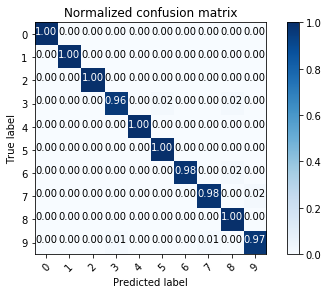

In [157]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = digits.target_names
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')